In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
from pylab import *
import scipy.integrate as integrate
#from cmocean import cm as cmo
import matplotlib.gridspec as gridspec
import matplotlib.ticker 
import scipy.stats as stats
import scipy.optimize as optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import savgol_filter
from netCDF4 import Dataset

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# Load Dedalus Run 1

#%% Pick the filename and path
filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_LONG.h5' #Ruan case F
visc = 1e-4

# filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_LOWV.h5' #Ruan case F
# visc = 5e-5

f = h5py.File(filename, 'r')

# Get the data
data = list(f['tasks'])

# Basic parameters
N = f['tasks']['N'][0,0,0] #Interior stratification (background)
tht = f['tasks']['tht'] # Slope angle


# Load variables in physical space
u = f['tasks']['u'] # Cross-slope direction
v = f['tasks']['v'] # Along-slope direction
w = f['tasks']['w']

b = f['tasks']['b'] # Perturbation buoyancy


diss = f['tasks']['Diss']
dissb = f['tasks']['DISSBPRIME']

# Domain parameters
x = u.dims[1][0][:]
z = u.dims[2][0][:]
time = u.dims[0][0][:]
# kx = f['scales/kx'][:]/(2*np.pi) # Inverse wavelengths in cross-front direction

# Calculations
zm = z-z[-1]

um = np.mean(u, axis=1)
vm = np.mean(v, axis=1)
# up = u - um[:,np.newaxis,:]
# vp = v - vm[:,np.newaxis,:]

uz = np.gradient(um, axis=-1)/np.gradient(z)
vz = np.gradient(vm, axis=-1)/np.gradient(z) 
wz = np.gradient(w, axis=-1)/np.gradient(z)
wx = np.gradient(w, axis=1)/np.gradient(x[np.newaxis,:,np.newaxis], axis=1)

bm = np.mean(b, axis=1)
# bmz = np.gradient(bm, axis=-1)/np.gradient(z)
MPE = 0.5*bm**2/N**2

mdiss = -visc*uz**2 - visc*vz**2
WDISS = -visc*np.mean(wz**2 + wx**2, axis=1)
WDISS = 0*WDISS
# mdiss = 0*mdiss

startind=0
zl = range(0, 256)
DISSIT_d = integrate.cumtrapz(integrate.trapz(mdiss[startind:,zl] + diss[startind:,0,zl]+WDISS[startind:,zl], x=z[zl], axis=-1), x=time[startind:], initial=0)
MPEI_d = integrate.trapz(MPE[startind:,zl], x=z[zl], axis=-1)  - integrate.trapz(MPE[startind:,zl], x=z[zl], axis=-1)[0]
# EKEEPEI = integrate.cumtrapz(integrate.trapz(vbfr[startind:,0,zl], x=z[zl], axis=-1), x=time[startind:], initial=0)
MIXI_d = integrate.cumtrapz(integrate.trapz(dissb[startind:,0,zl], x=z[zl], axis=-1), x=time[startind:], initial=0)
time_d = time

In [3]:
# Load Dedalus Run 1

#%% Pick the filename and path
# filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_LONG.h5' #Ruan case F
# visc = 1e-4

filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_LOWV_2.h5' #Ruan case F
visc = 1e-5

f = h5py.File(filename, 'r')

# Get the data
data = list(f['tasks'])

# Basic parameters
N = f['tasks']['N'][0,0,0] #Interior stratification (background)
tht = f['tasks']['tht'] # Slope angle


# Load variables in physical space
u = f['tasks']['u'] # Cross-slope direction
v = f['tasks']['v'] # Along-slope direction
w = f['tasks']['w']

b = f['tasks']['b'] # Perturbation buoyancy


diss = f['tasks']['Diss']
dissb = f['tasks']['DISSBPRIME']

# Domain parameters
x = u.dims[1][0][:]
z = u.dims[2][0][:]
time = u.dims[0][0][:]
# kx = f['scales/kx'][:]/(2*np.pi) # Inverse wavelengths in cross-front direction

# Calculations
zm = z-z[-1]

um = np.mean(u, axis=1)
vm = np.mean(v, axis=1)
# up = u - um[:,np.newaxis,:]
# vp = v - vm[:,np.newaxis,:]

uz = np.gradient(um, axis=-1)/np.gradient(z)
vz = np.gradient(vm, axis=-1)/np.gradient(z) 
wz = np.gradient(w, axis=-1)/np.gradient(z)
wx = np.gradient(w, axis=1)/np.gradient(x[np.newaxis,:,np.newaxis], axis=1)

bm = np.mean(b, axis=1)
# bmz = np.gradient(bm, axis=-1)/np.gradient(z)
MPE = 0.5*bm**2/N**2

mdiss = -visc*uz**2 - visc*vz**2
WDISS = -visc*np.mean(wz**2 + wx**2, axis=1)
WDISS = 0*WDISS
# mdiss = 0*mdiss

startind=0
zl = range(0, 256)
DISSIT_2 = integrate.cumtrapz(integrate.trapz(mdiss[startind:,zl] + diss[startind:,0,zl]+WDISS[startind:,zl], x=z[zl], axis=-1), x=time[startind:], initial=0)
MPEI_2 = integrate.trapz(MPE[startind:,zl], x=z[zl], axis=-1)  - integrate.trapz(MPE[startind:,zl], x=z[zl], axis=-1)[0]
# EKEEPEI = integrate.cumtrapz(integrate.trapz(vbfr[startind:,0,zl], x=z[zl], axis=-1), x=time[startind:], initial=0)
MIXI_2 = integrate.cumtrapz(integrate.trapz(dissb[startind:,0,zl], x=z[zl], axis=-1), x=time[startind:], initial=0)
time_2 = time

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(0, 0.6)

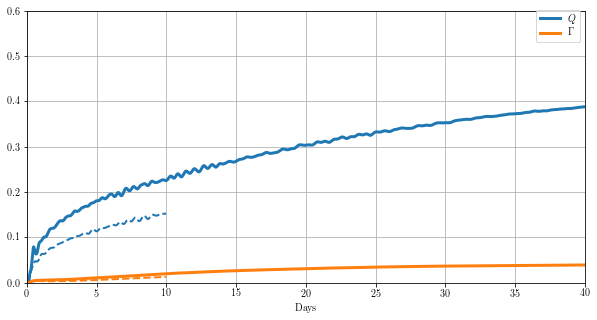

In [4]:

plt.figure(figsize=(10,5))
plt.plot(time_d[startind:]/86400, -MPEI_d/DISSIT_d,linewidth=3, label='$Q$')
plt.plot(time_2[startind:]/86400, -MPEI_2/DISSIT_2,linewidth=2,  linestyle='dashed', color='#1f77b4')
plt.plot(time_d[startind:]/86400, MIXI_d/DISSIT_d,linewidth=3, label='$\Gamma$')
plt.plot(time_2[startind:]/86400, MIXI_2/DISSIT_2,linewidth=2, linestyle='dashed', color='#ff7f0e')

# plt.plot(time[startind:]/86400, EKEEPEI/DISSIT,linewidth=2, label='$\int_0^t VBF/\int_0^t \epsilon$') # VBF/EPSILON (cumulative in time)
plt.ylim(-0.1,1)
plt.grid()
plt.legend(bbox_to_anchor=(0., 0.92, 1., .102))
plt.xlabel('Days')
plt.xlim(0, 40)
plt.ylim(0, 0.6)


(0, 0.06)

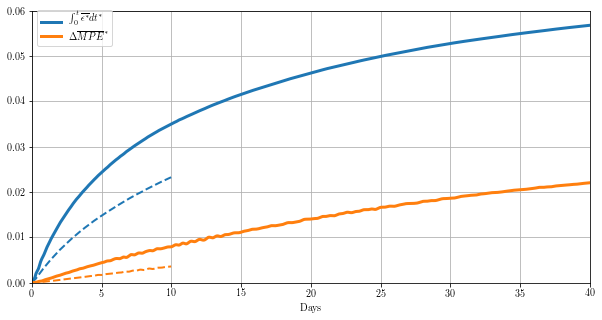

In [5]:
# Plot dissipation rates


norm = 0.1**3*1e4
plt.figure(figsize=(10,5))
plt.plot(time_d[startind:]/86400, -DISSIT_d/(norm),linewidth=3, label='$\int_0^t \overline{\epsilon^*} dt^*$')
plt.plot(time_2[startind:]/86400, -DISSIT_2/(norm),linewidth=2,  linestyle='dashed', color='#1f77b4')
plt.plot(time_d[startind:]/86400, MPEI_d/norm,linewidth=3, label='$\Delta \overline{MPE}^*$')
plt.plot(time_2[startind:]/86400, MPEI_2/norm,linewidth=2, linestyle='dashed', color='#ff7f0e')
# plt.plot(time[startind:]/86400, 0.1**3*time/(10*1030))
# plt.plot(time[startind:]/86400, EKEEPEI/DISSIT,linewidth=2, label='$\int_0^t VBF/\int_0^t \epsilon$') # VBF/EPSILON (cumulative in time)
# plt.ylim(-0.1,1)
plt.grid()
plt.legend(bbox_to_anchor=(0., 0.92, 1., .102))
plt.xlabel('Days')
plt.xlim(0, 40)
# plt.ylabel('$m^3s^{-2}$')
plt.ylim(0, 0.06)

# plt.savefig('./DISSMPE_1e-5_0p02.pdf', bbox_inches='tight')